# Problem Statement

### Businesses or companies can fall prey to default if they are not able to keep up their debt obligations. Defaults will lead to a lower credit rating for the company which in turn reduces its chances of getting credit in the future and may have to pay higher interests on existing debts as well as any new obligations. From an investor's point of view, he would want to invest in a company if it is capable of handling its financial obligations, can grow quickly, and is able to manage the growth scale.

### A balance sheet is a financial statement of a company that provides a snapshot of what a company owns, owes, and the amount invested by the shareholders. Thus, it is an important tool that helps evaluate the performance of a business.

### Data that is available includes information from the financial statement of the companies for the previous year (2015). Also, information about the Networth of the company in the following year (2016) is provided which can be used to drive the labeled field.

### Explanation of data fields available in Data Dictionary, 'Credit Default Data Dictionary.xlsx'

### Hints :

### Dependent variable - We need to create a default variable that should take the value of 1 when net worth next year is negative & 0 when net worth next year is positive.



In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

#!pip install imblearn

Let us now go ahead and read the dataset and check the first five rows of the dataset.

#### Importing the dataset

In [2]:
df = pd.read_excel('Company_Data2015-1.xlsx')
pd.set_option('display.max_columns', None)
#Glimpse of Data
df.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,Total Assets/Liabilities,Gross Sales,Net Sales,Other Income,Value Of Output,Cost of Production,Selling Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted PAT,CP,Revenue earnings in forex,Revenue expenses in forex,Capital expenses in forex,Book Value (Unit Curr),Book Value (Adj.) (Unit Curr),Market Capitalisation,CEPS (annualised) (Unit Curr),Cash Flow From Operating Activities,Cash Flow From Investing Activities,Cash Flow From Financing Activities,ROG-Net Worth (%),ROG-Capital Employed (%),ROG-Gross Block (%),ROG-Gross Sales (%),ROG-Net Sales (%),ROG-Cost of Production (%),ROG-Total Assets (%),ROG-PBIDT (%),ROG-PBDT (%),ROG-PBIT (%),ROG-PBT (%),ROG-PAT (%),ROG-CP (%),ROG-Revenue earnings in forex (%),ROG-Revenue expenses in forex (%),ROG-Market Capitalisation (%),Current Ratio[Latest],Fixed Assets Ratio[Latest],Inventory Ratio[Latest],Debtors Ratio[Latest],Total Asset Turnover Ratio[Latest],Interest Cover Ratio[Latest],PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,0.00,7.60,-0.07,137.67,0.00,-179.06,-926.52,-185.53,-932.99,-932.99,-937.85,-926.52,0.00,0.00,0.00,-167.58,-167.58,0.00,-22.09,-102.47,1.46,92.58,-15.31,-20.76,-9.75,0.00,0.00,1.38,-25.75,5.23,-19.29,4.43,-19.33,-19.33,-19.29,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,-0.20,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,2892.73,2892.73,46.27,2900.71,2572.46,40.51,646.46,-4.32,35.53,-615.25,-615.25,-617.14,-4.32,6.35,143.42,141.17,-15.18,-15.18,1544.39,-0.02,635.91,-785.00,176.93,-26.15,6.30,3.17,5.92,5.92,13.16,6.66,5.24,-108.77,614.89,-9.85,-9.85,-108.77,1.93,34.00,6.61,0.08,0.25,804.44,10.35,0.30,-0.84,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,392.13,392.13,9.55,301.16,408.51,54.83,-281.92,-1086.71,-381.10,-1185.89,-897.70,-873.39,-798.52,0.00,86.36,2.27,94.14,94.14,1220.81,-148.31,-873.40,-458.27,1187.51,-61.86,15.66,-2.07,-75.87,-75.87,-69.93,-0.78,-169.69,-431.68,-221.85,-300.41,-350.43,-642.67,-100.00,-81.21,-6.31,1.06,0.03,0.01,0.42,0.00,-2.21,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,1354.39,1354.39,223.85,1350.14,1326.99,3.34,-213.01,-677.57,-336.73,-801.29,-801.29,-770.18,-677.57,0.89,28.88,0.00,-39.64,-39.64,194.27,-43.08,324.47,17.31,-412.55,-450.67,-40.84,-1.80,8.33,8.33,16.59,-10.12,-203.84,-102.72,-455.28,-80.23,-70.57,-88.52,-52.91,-33.85,-13.94,0.09,5.08,411.15,9.26,0.00,-0.16,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,38.72,38.72,9.82,38.72,186.29,1.97,-647.86,-944.42,-710.13,-1006.69,-864.58,-327.77,-802.31,0.00,15.62,0.00,-212.89,-212.89,113.68,-159.50,-191.54,61.34,143.65,-559.83,-11.76,0.34,-80.61,-80.61,-48.80,-5.81,-40.07,3.28,-38.72,1.87,-2.59,-1.13,-100.00,-91.17,-12.91,0.50,0.05,0.02,1.28,0.01,-0.73,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [3]:
df.columns

Index(['Co_Code', 'Co_Name', 'Networth Next Year', 'Equity Paid Up',
       'Networth', 'Capital Employed', 'Total Debt', 'Gross Block ',
       'Net Working Capital ', 'Current Assets ',
       'Current Liabilities and Provisions ', 'Total Assets/Liabilities ',
       'Gross Sales', 'Net Sales', 'Other Income', 'Value Of Output',
       'Cost of Production', 'Selling Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted PAT', 'CP', 'Revenue earnings in forex',
       'Revenue expenses in forex', 'Capital expenses in forex',
       'Book Value (Unit Curr)', 'Book Value (Adj.) (Unit Curr)',
       'Market Capitalisation', 'CEPS (annualised) (Unit Curr)',
       'Cash Flow From Operating Activities',
       'Cash Flow From Investing Activities',
       'Cash Flow From Financing Activities', 'ROG-Net Worth (%)',
       'ROG-Capital Employed (%)', 'ROG-Gross Block (%)',
       'ROG-Gross Sales (%)', 'ROG-Net Sales (%)',
       'ROG-Cost of Production (%)', 'ROG-Total Assets (%)', 

# Fixing messy column names (containing spaces) for ease of use

In [4]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/','_by_').str.replace('&','and').str.replace('[','').str.replace(']','').str.replace('-','_').str.replace('.','')

In [5]:
df.columns

Index(['Co_Code', 'Co_Name', 'Networth_Next_Year', 'Equity_Paid_Up',
       'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block',
       'Net_Working_Capital', 'Current_Assets',
       'Current_Liabilities_and_Provisions', 'Total_Assets_by_Liabilities',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Capital_expenses_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj_Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
      

#### First, let us check the number of rows (observations) and the number of columns (variables).

In [6]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


#### Now, let us check the basic measures of descriptive statistics for the continuous variables.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Co_Code,3586.0,16065.388734,19776.817379,4.00,3029.2500,6077.500,24269.5000,72493.00
Networth_Next_Year,3586.0,725.045251,4769.681004,-8021.60,3.9850,19.015,123.8025,111729.10
Equity_Paid_Up,3586.0,62.966584,778.761744,0.00,3.7500,8.290,19.5175,42263.46
Networth,3586.0,649.746299,4091.988792,-7027.48,3.8925,18.580,117.2975,81657.35
Capital_Employed,3586.0,2799.611054,26975.135385,-1824.75,7.6025,39.090,226.6050,714001.25
...,...,...,...,...,...,...,...,...
Debtors_Velocity_Days,3586.0,603.894032,10636.759580,0.00,8.0000,49.000,106.0000,514721.00
Creditors_Velocity_Days,3586.0,2057.854992,54169.479197,0.00,8.0000,39.000,89.0000,2034145.00
Inventory_Velocity_Days,3483.0,79.644559,137.847792,-199.00,0.0000,35.000,96.0000,996.00
Value_of_Output_by_Total_Assets,3586.0,0.819757,1.201400,-0.33,0.0700,0.480,1.1600,17.63


### Add Dependent variable in the data, as Described in the problem statement.

In [8]:
df['default'] = np.where((df['Networth_Next_Year'] > 0), 0, 1)

In [9]:
df.default.value_counts()

0    3198
1     388
Name: default, dtype: int64

In [10]:
df.shape

(3586, 68)

### Checking proportion of default

In [11]:
df.default.sum() / len(df.default)

0.10819854991634133

### Data types of all variables

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 68 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block                          3586 non-null   float64
 8   Net_Working_Capital                  3586 non-null   float64
 9   Current_Assets                       3586 non-null   float64
 10  Current_Liabilities_and_Provisions   3586 non-null   float64
 11  Total_Assets_by_Liabilities   

### Check for NULL values

In [13]:
df.isnull().sum()

Co_Code                              0
Co_Name                              0
Networth_Next_Year                   0
Equity_Paid_Up                       0
Networth                             0
                                  ... 
Creditors_Velocity_Days              0
Inventory_Velocity_Days            103
Value_of_Output_by_Total_Assets      0
Value_of_Output_by_Gross_Block       0
default                              0
Length: 68, dtype: int64

In [14]:
#Columns with missing values
print(np.where(df.isnull().sum()>0))

(array([29, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 64], dtype=int64),)


In [15]:
df.iloc[:,64].isnull().sum()

103

In [16]:
list(df)

['Co_Code',
 'Co_Name',
 'Networth_Next_Year',
 'Equity_Paid_Up',
 'Networth',
 'Capital_Employed',
 'Total_Debt',
 'Gross_Block',
 'Net_Working_Capital',
 'Current_Assets',
 'Current_Liabilities_and_Provisions',
 'Total_Assets_by_Liabilities',
 'Gross_Sales',
 'Net_Sales',
 'Other_Income',
 'Value_Of_Output',
 'Cost_of_Production',
 'Selling_Cost',
 'PBIDT',
 'PBDT',
 'PBIT',
 'PBT',
 'PAT',
 'Adjusted_PAT',
 'CP',
 'Revenue_earnings_in_forex',
 'Revenue_expenses_in_forex',
 'Capital_expenses_in_forex',
 'Book_Value_Unit_Curr',
 'Book_Value_Adj_Unit_Curr',
 'Market_Capitalisation',
 'CEPS_annualised_Unit_Curr',
 'Cash_Flow_From_Operating_Activities',
 'Cash_Flow_From_Investing_Activities',
 'Cash_Flow_From_Financing_Activities',
 'ROG_Net_Worth_perc',
 'ROG_Capital_Employed_perc',
 'ROG_Gross_Block_perc',
 'ROG_Gross_Sales_perc',
 'ROG_Net_Sales_perc',
 'ROG_Cost_of_Production_perc',
 'ROG_Total_Assets_perc',
 'ROG_PBIDT_perc',
 'ROG_PBDT_perc',
 'ROG_PBIT_perc',
 'ROG_PBT_perc',
 'RO

## Drop the fields CO_Code and CO_name , since these are not required for our model.
## Also Drop column Networth_Next_Year, Because we used this field to build the Dependent Field "default"

In [17]:
df.drop('Co_Code',axis=1,inplace=True)
df.drop('Co_Name',axis=1,inplace=True)
df.drop('Networth_Next_Year',axis=1,inplace=True)

In [18]:
list(df)

['Equity_Paid_Up',
 'Networth',
 'Capital_Employed',
 'Total_Debt',
 'Gross_Block',
 'Net_Working_Capital',
 'Current_Assets',
 'Current_Liabilities_and_Provisions',
 'Total_Assets_by_Liabilities',
 'Gross_Sales',
 'Net_Sales',
 'Other_Income',
 'Value_Of_Output',
 'Cost_of_Production',
 'Selling_Cost',
 'PBIDT',
 'PBDT',
 'PBIT',
 'PBT',
 'PAT',
 'Adjusted_PAT',
 'CP',
 'Revenue_earnings_in_forex',
 'Revenue_expenses_in_forex',
 'Capital_expenses_in_forex',
 'Book_Value_Unit_Curr',
 'Book_Value_Adj_Unit_Curr',
 'Market_Capitalisation',
 'CEPS_annualised_Unit_Curr',
 'Cash_Flow_From_Operating_Activities',
 'Cash_Flow_From_Investing_Activities',
 'Cash_Flow_From_Financing_Activities',
 'ROG_Net_Worth_perc',
 'ROG_Capital_Employed_perc',
 'ROG_Gross_Block_perc',
 'ROG_Gross_Sales_perc',
 'ROG_Net_Sales_perc',
 'ROG_Cost_of_Production_perc',
 'ROG_Total_Assets_perc',
 'ROG_PBIDT_perc',
 'ROG_PBDT_perc',
 'ROG_PBIT_perc',
 'ROG_PBT_perc',
 'ROG_PAT_perc',
 'ROG_CP_perc',
 'ROG_Revenue_earn

In [19]:
(((df.isnull().sum().sort_values(ascending=False)/df.index.size))).sort_values(ascending=False)

Inventory_Velocity_Days             0.028723
Book_Value_Adj_Unit_Curr            0.001115
Total_Asset_Turnover_RatioLatest    0.000279
CPM_percLatest                      0.000279
PBDTM_percLatest                    0.000279
                                      ...   
ROG_Net_Worth_perc                  0.000000
Networth                            0.000000
PBIDT                               0.000000
Capital_Employed                    0.000000
default                             0.000000
Length: 65, dtype: float64

# Treat missing values

In [20]:
from sklearn.impute import KNNImputer

In [21]:
imputer = KNNImputer(n_neighbors=10)

In [22]:
df = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

In [23]:
df.isnull().sum()

Equity_Paid_Up                     0
Networth                           0
Capital_Employed                   0
Total_Debt                         0
Gross_Block                        0
                                  ..
Creditors_Velocity_Days            0
Inventory_Velocity_Days            0
Value_of_Output_by_Total_Assets    0
Value_of_Output_by_Gross_Block     0
default                            0
Length: 65, dtype: int64

In [24]:
df['default'].describe()

count    3586.000000
mean        0.108199
std         0.310674
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: default, dtype: float64

### Outlier detection & Treatment

<AxesSubplot:>

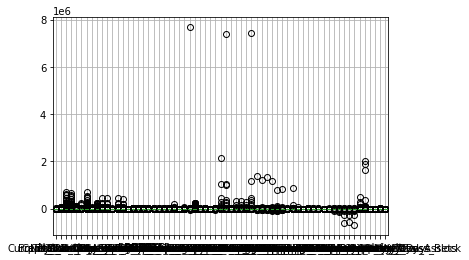

In [25]:
df.boxplot()

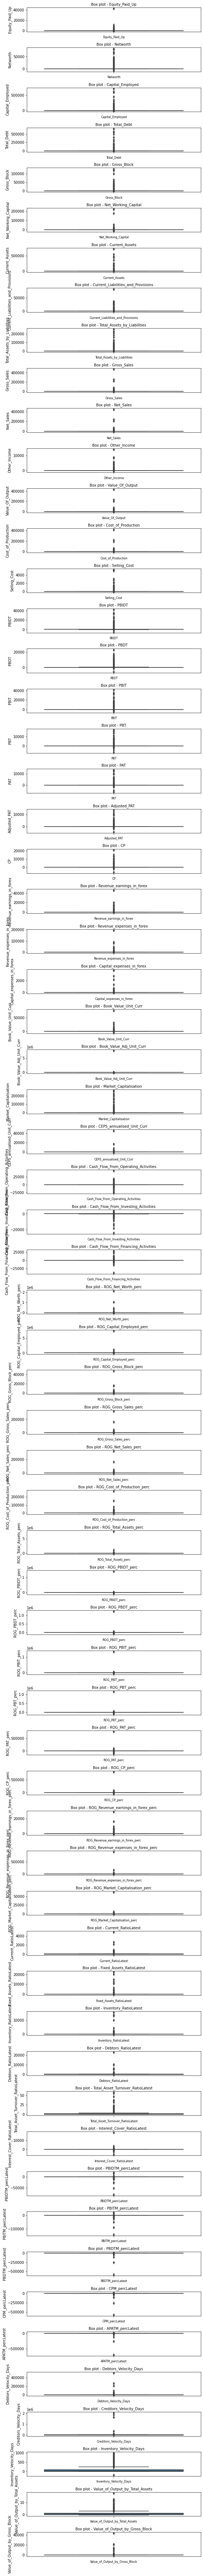

In [26]:
col_names = list(df.columns)
col_names.remove('default')
fig, ax = plt.subplots(len(col_names), figsize=(8,100))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    plt.tight_layout()

plt.show()

### Creating outlier identification (Lower & Upper whiskers) function

In [27]:
df_X = df.drop('default', axis = 1)
df_Y = df['default']

In [28]:
Q1=df_X.quantile(0.25)
Q3=df_X.quantile(0.55)
IQR=Q3-Q1
LR= Q1-(1.5 * IQR)
UR= Q3+(1.5 * IQR)

### Check total how many records are lying beyond upper and lower bounds limits

In [29]:
((df_X>UR)|(df_X<LR)).sum()

Equity_Paid_Up                      905
Networth                           1342
Capital_Employed                   1220
Total_Debt                         1247
Gross_Block                        1236
                                   ... 
Debtors_Velocity_Days               738
Creditors_Velocity_Days             770
Inventory_Velocity_Days             700
Value_of_Output_by_Total_Assets     633
Value_of_Output_by_Gross_Block      984
Length: 64, dtype: int64

###  there are many ways we can Treat Outliers , Either we can bring back to Upper Limit or Lower limit to outliers
### Or we can impute them to K Nearest neighbure Method

In our Case, we dont know Company Segmentations, and COmpanies can have different levels of Revenue, Profits and all can be Valid at same time.

So we will Treat them with K nearest neighbure mathod, and Treat them same as we did for Missing values.

### Let's Convert all Outliers to NAN first of all 

In [30]:
df_X[((df_X > UR) | (df_X < LR))]= np.nan

In [31]:
df = pd.concat([df_X, df_Y], axis = 1)

In [32]:
df.isnull().sum()

Equity_Paid_Up                      905
Networth                           1342
Capital_Employed                   1220
Total_Debt                         1247
Gross_Block                        1236
                                   ... 
Creditors_Velocity_Days             770
Inventory_Velocity_Days             700
Value_of_Output_by_Total_Assets     633
Value_of_Output_by_Gross_Block      984
default                               0
Length: 65, dtype: int64

In [33]:
df_X.isnull().sum()

Equity_Paid_Up                      905
Networth                           1342
Capital_Employed                   1220
Total_Debt                         1247
Gross_Block                        1236
                                   ... 
Debtors_Velocity_Days               738
Creditors_Velocity_Days             770
Inventory_Velocity_Days             700
Value_of_Output_by_Total_Assets     633
Value_of_Output_by_Gross_Block      984
Length: 64, dtype: int64

In [34]:
df_X.isnull().sum().sum()

80599

### Let's visually inspect the missing values in our data

In [35]:
df_sub1 = pd.concat([df_X, df_Y], axis =1 )

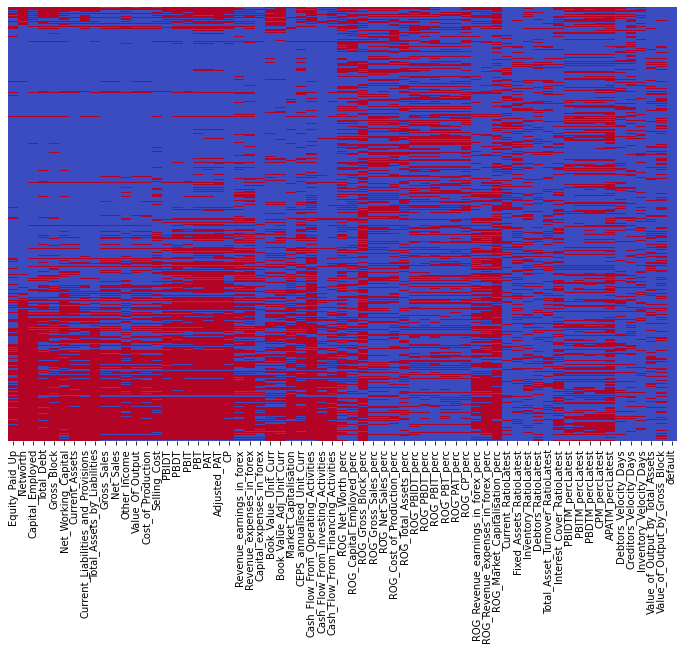

In [36]:
plt.figure(figsize = (12,8))
sns.heatmap(df_sub1.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

In [37]:
df_sub1.isnull().sum(axis = 1)

0       25
1       42
2       53
3       45
4       41
        ..
3581    33
3582    45
3583    40
3584    43
3585    49
Length: 3586, dtype: int64

In [38]:
df_sub1['default'].value_counts()

0.0    3198
1.0     388
Name: default, dtype: int64

In [39]:
df_sub1.isnull().sum().sort_values(ascending = False)/df_sub1.index.size

ROG_Market_Capitalisation_perc     0.603458
ROG_Gross_Block_perc               0.542666
Adjusted_PAT                       0.532348
PAT                                0.527886
PBT                                0.527886
                                     ...   
Debtors_RatioLatest                0.203291
Inventory_Velocity_Days            0.195204
Capital_expenses_in_forex          0.193530
Value_of_Output_by_Total_Assets    0.176520
default                            0.000000
Length: 65, dtype: float64

In [40]:
for cols in df_sub1.columns:
    if (df_sub1[cols].isnull().sum()/df_sub1[cols].index.size) > 0.3 :
        print(cols+ ' : ' + str(df_sub1[cols].isnull().sum()/df_sub1[cols].index.size))

Networth : 0.37423312883435583
Capital_Employed : 0.3402119353039598
Total_Debt : 0.34774121583937534
Gross_Block : 0.34467373117679867
Net_Working_Capital : 0.37451199107640826
Current_Assets : 0.33073061907417733
Current_Liabilities_and_Provisions : 0.3363078639152259
Total_Assets_by_Liabilities : 0.3301728945900725
Gross_Sales : 0.33686558839933073
Net_Sales : 0.3390964863357501
Other_Income : 0.33463469046291133
Value_Of_Output : 0.3365867261572783
Cost_of_Production : 0.3343558282208589
Selling_Cost : 0.3781372002230898
PBIDT : 0.40211935303959845
PBDT : 0.4668153931957613
PBIT : 0.44171779141104295
PBT : 0.5278862242052426
PAT : 0.5278862242052426
Adjusted_PAT : 0.5323480200780815
CP : 0.4617958728388176
Revenue_earnings_in_forex : 0.3781372002230898
Revenue_expenses_in_forex : 0.4316787506971556
Book_Value_Unit_Curr : 0.3379810373675404
Book_Value_Adj_Unit_Curr : 0.33825989960959285
Market_Capitalisation : 0.3594534300055772
CEPS_annualised_Unit_Curr : 0.4221974344673731
Cash_Fl

In [41]:
df_sub2 = df_sub1.drop(['Networth',
'Capital_Employed',
'Total_Debt',
'Gross_Block',
'Net_Working_Capital',
'Current_Assets',
'Current_Liabilities_and_Provisions',
'Total_Assets_by_Liabilities',
'Gross_Sales',
'Net_Sales',
'Other_Income',
'Value_Of_Output',
'Cost_of_Production',
'Selling_Cost',
'PBIDT',
'PBDT',
'PBIT',
'PBT',
'PAT',
'Adjusted_PAT',
'CP',
'Revenue_earnings_in_forex',
'Revenue_expenses_in_forex',
'Book_Value_Unit_Curr',
'Book_Value_Adj_Unit_Curr',
'Market_Capitalisation',
'CEPS_annualised_Unit_Curr',
'Cash_Flow_From_Operating_Activities',
'ROG_Net_Worth_perc',
'ROG_Capital_Employed_perc',
'ROG_Gross_Block_perc',
'ROG_Gross_Sales_perc',
'ROG_Net_Sales_perc',
'ROG_Cost_of_Production_perc',
'ROG_Total_Assets_perc',
'ROG_PBIDT_perc',
'ROG_PBDT_perc',
'ROG_PBIT_perc',
'ROG_PBT_perc',
'ROG_PAT_perc',
'ROG_CP_perc',
'ROG_Revenue_earnings_in_forex_perc',
'ROG_Revenue_expenses_in_forex_perc',
'ROG_Market_Capitalisation_perc',
'Interest_Cover_RatioLatest',
'PBITM_percLatest',
'PBDTM_percLatest',
'CPM_percLatest',
'APATM_percLatest'],axis = 1)

In [42]:
df_sub2.shape

(3586, 16)

### Segregate the predictors and response

In [43]:
predictors = df_sub2.drop('default', axis = 1)
response = df_sub2['default']

In [44]:
df_sub3 = pd.concat([predictors, response], axis = 1)

### Imputing the remaining missing values

In [45]:
imputer = KNNImputer(n_neighbors=5)

In [46]:
Company_imputed = pd.DataFrame(imputer.fit_transform(df_sub3), columns = df_sub3.columns)

In [47]:
Company_imputed.isnull().sum()

Equity_Paid_Up                         0
Capital_expenses_in_forex              0
Cash_Flow_From_Investing_Activities    0
Cash_Flow_From_Financing_Activities    0
Current_RatioLatest                    0
Fixed_Assets_RatioLatest               0
Inventory_RatioLatest                  0
Debtors_RatioLatest                    0
Total_Asset_Turnover_RatioLatest       0
PBIDTM_percLatest                      0
Debtors_Velocity_Days                  0
Creditors_Velocity_Days                0
Inventory_Velocity_Days                0
Value_of_Output_by_Total_Assets        0
Value_of_Output_by_Gross_Block         0
default                                0
dtype: int64

In [48]:
Company_imputed.isnull().sum().sum()

0

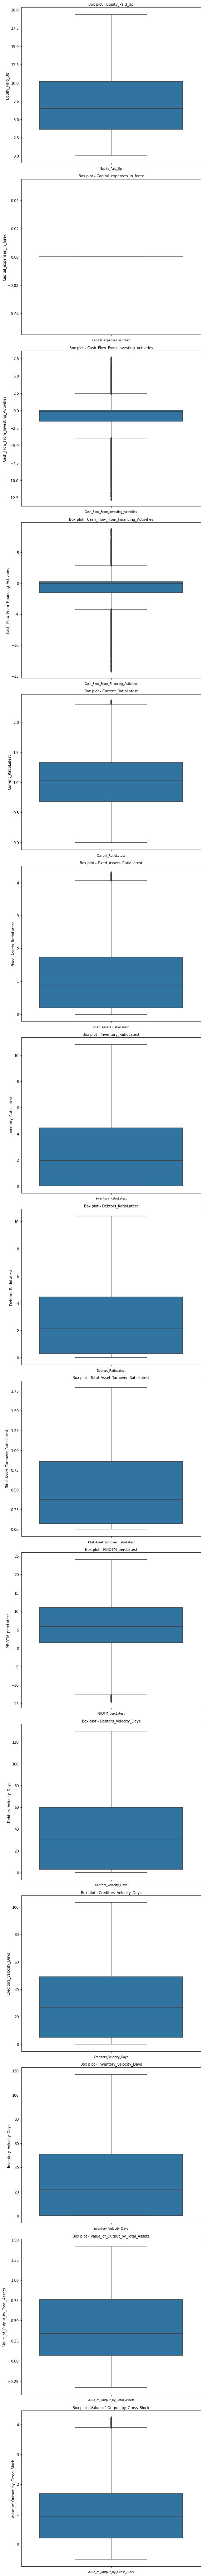

In [49]:
col_names = list(Company_imputed.columns)
col_names.remove('default')
fig, ax = plt.subplots(len(col_names), figsize=(8,100))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=Company_imputed[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    plt.tight_layout()

plt.show()

### Univariate Analysis: Balance & Income variables

In [50]:
for cols in Company_imputed.columns:
    print(cols+':'+ str(Company_imputed[cols].nunique()))

Equity_Paid_Up:1956
Capital_expenses_in_forex:1
Cash_Flow_From_Investing_Activities:1635
Cash_Flow_From_Financing_Activities:1824
Current_RatioLatest:760
Fixed_Assets_RatioLatest:1021
Inventory_RatioLatest:1400
Debtors_RatioLatest:1409
Total_Asset_Turnover_RatioLatest:606
PBIDTM_percLatest:2243
Debtors_Velocity_Days:378
Creditors_Velocity_Days:346
Inventory_Velocity_Days:424
Value_of_Output_by_Total_Assets:533
Value_of_Output_by_Gross_Block:1045
default:2


In [51]:
for cols in Company_imputed.columns:
    if Company_imputed[cols].nunique()==1:
        print('Column name is '+cols+' and its unique value count is : '+ str(Company_imputed[cols].nunique()))

Column name is Capital_expenses_in_forex and its unique value count is : 1


# Since these columns have only 1 value in it, we can not use it for our Predictions. So lets Drop these fields:

In [52]:
Company_imputed.drop('Capital_expenses_in_forex',axis=1, inplace=True)

Index(['Equity_Paid_Up', 'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'Current_RatioLatest',
       'Fixed_Assets_RatioLatest', 'Inventory_RatioLatest',
       'Debtors_RatioLatest', 'Total_Asset_Turnover_RatioLatest',
       'PBIDTM_percLatest', 'Debtors_Velocity_Days', 'Creditors_Velocity_Days',
       'Inventory_Velocity_Days', 'Value_of_Output_by_Total_Assets',
       'Value_of_Output_by_Gross_Block', 'default'],
      dtype='object')


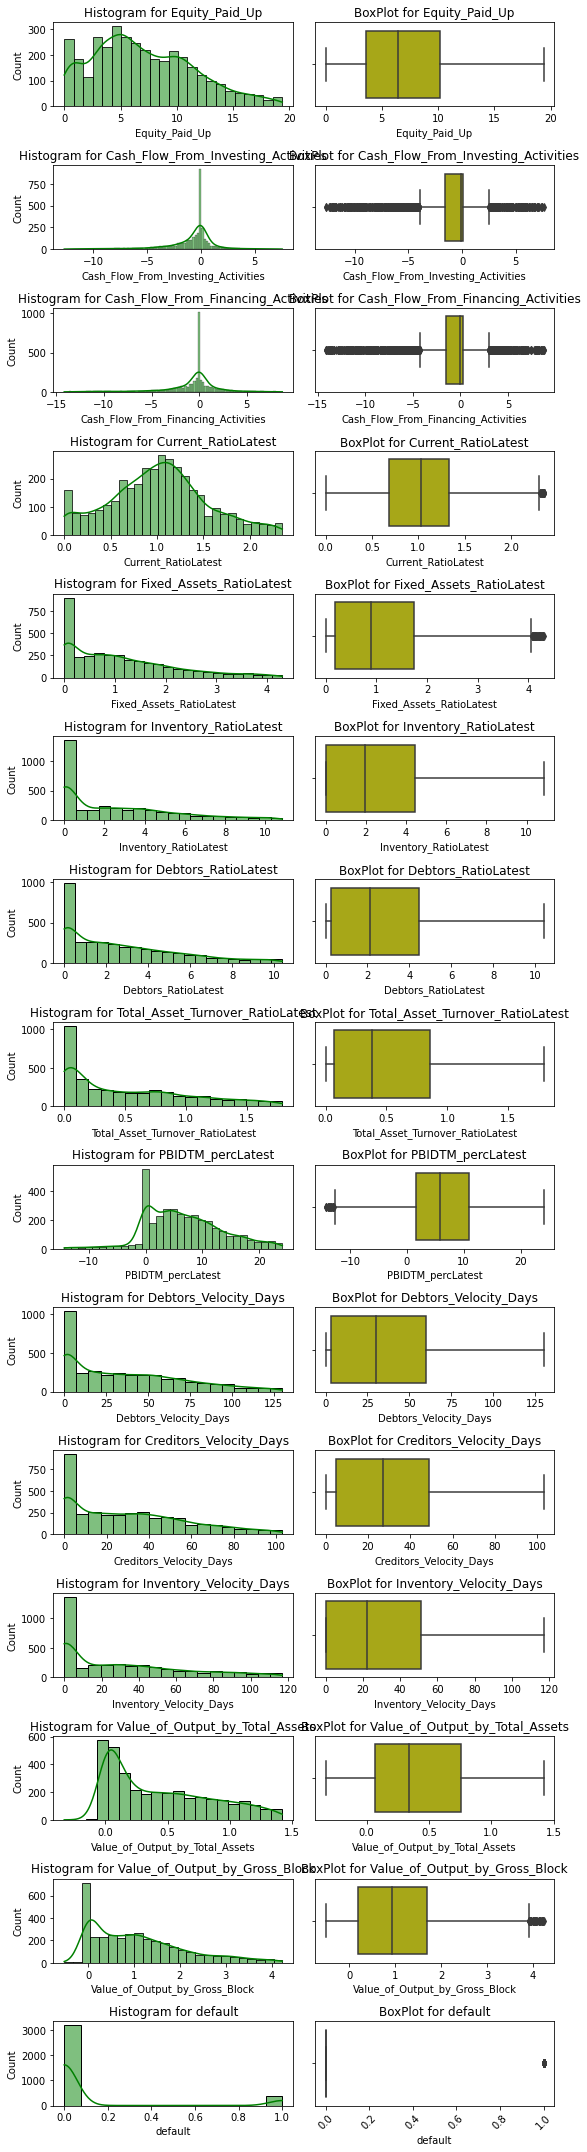

In [53]:
col_list=Company_imputed.columns
print(col_list)

fig, axes = plt.subplots(nrows=len(col_list),ncols=2)
fig.set_size_inches(8,30)
x=0
y=0
for i in Company_imputed.select_dtypes(include='number'):
        ax_hist=sns.histplot(x=Company_imputed[i], kde=True, ax=axes[x][y], color='g')
        ax_box=sns.boxplot(x=Company_imputed[i], data=Company_imputed, ax=axes[x][y+1], color='y')
        plt.xticks(rotation=45)
        ax_hist.set(xlabel=i,title='Histogram for '+i)
        ax_box.set(xlabel=i,title='BoxPlot for '+i)
        plt.tight_layout()
        x=x+1

#### Checking proportion of default

In [54]:
Company_imputed["default"].value_counts(normalize = True)

0.0    0.891801
1.0    0.108199
Name: default, dtype: float64

Data seems highly imbalanced

### Correlation heatmap

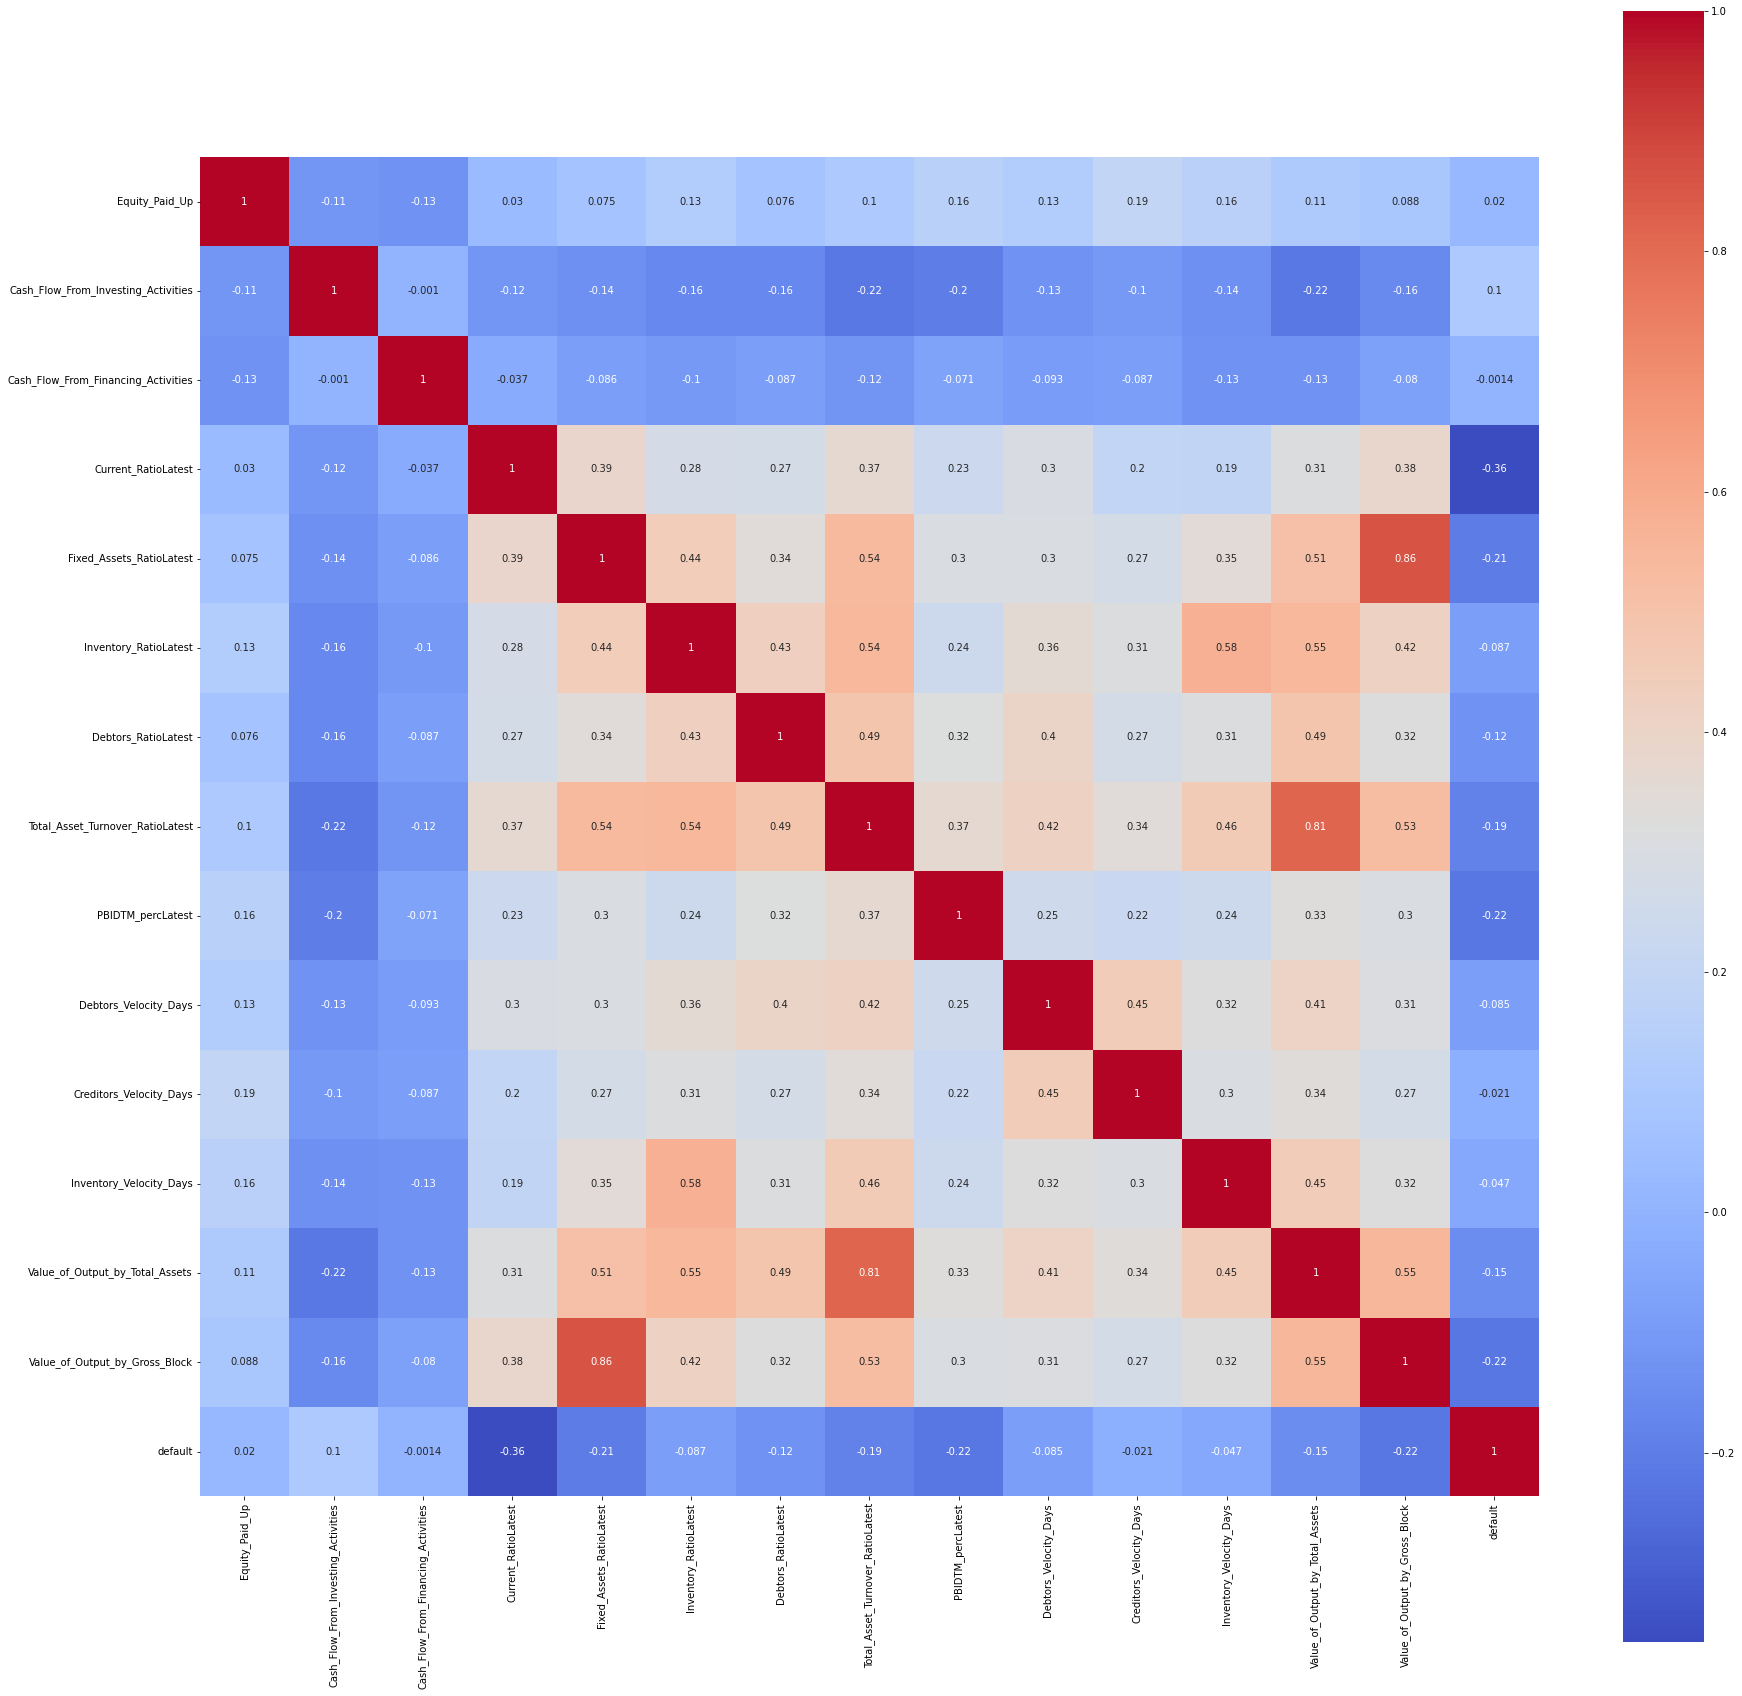

In [55]:
#calculate column correlations and make a seaborn heatmap - Before standardisation

plt.figure(figsize=(30,30))  # setting the size of figure to 12 by 10
p=sns.heatmap(Company_imputed.corr(), annot=True,cmap='coolwarm',square=True)

## Model Building using Stats Model for 'Probability at default'

In [56]:
import statsmodels.formula.api as SM

# Model 1

In [57]:
Company_imputed.columns

Index(['Equity_Paid_Up', 'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'Current_RatioLatest',
       'Fixed_Assets_RatioLatest', 'Inventory_RatioLatest',
       'Debtors_RatioLatest', 'Total_Asset_Turnover_RatioLatest',
       'PBIDTM_percLatest', 'Debtors_Velocity_Days', 'Creditors_Velocity_Days',
       'Inventory_Velocity_Days', 'Value_of_Output_by_Total_Assets',
       'Value_of_Output_by_Gross_Block', 'default'],
      dtype='object')

##### Inference: 
Defaulters seem to have higher outstanding balance compared non-defaulters.
Defaulters' income seems lower compared to non-defaulters.

# Start of Credit Risk Modelling PD 

In [58]:
Company_imputed.head()

,Equity_Paid_Up,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,Current_RatioLatest,Fixed_Assets_RatioLatest,Inventory_RatioLatest,Debtors_RatioLatest,Total_Asset_Turnover_RatioLatest,PBIDTM_percLatest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block,default
0,11.276,1.460,-2.288,0.02,0.000,0.00,0.00,0.00,0.000,0.0,0.0,45.0,0.00,0.00,1.0
1,4.722,-0.098,1.452,0.08,0.250,0.20,10.35,0.30,-10.300,29.0,101.0,2.0,0.31,0.24,1.0
2,7.112,0.032,-0.104,1.06,0.030,0.01,0.42,0.00,0.000,97.0,28.6,0.0,-0.03,-0.26,1.0
3,7.874,-1.290,1.570,0.09,0.396,0.24,9.26,0.00,-3.330,93.0,63.0,2.0,0.24,1.90,1.0
4,6.126,0.382,-2.052,0.50,0.050,0.02,1.28,0.01,3.116,3.8,17.8,0.0,0.01,0.05,1.0


#### Partitioning the data into train and test

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X = Company_imputed.drop('default', axis = 1)
y = Company_imputed['default']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42, stratify = y)

In [62]:
print(X_train.shape)
print(X_test.shape)

(2402, 14)
(1184, 14)


##### Why stratify = y?
Please note, because this data is highly imbalanced and could possibly result into different proportions in the y variable between train and test set.

In [63]:
print(y_train.value_counts(normalize = True).round(2))
print(' ')
print(y_test.value_counts(normalize = True).round(2))

0.0    0.89
1.0    0.11
Name: default, dtype: float64
 
0.0    0.89
1.0    0.11
Name: default, dtype: float64


# Model Building using Stats model for 'Probability at default'

#### Now, Importing statsmodels modules

In [64]:
import statsmodels.formula.api as SM

#### Creating logistic regression equation & storing it in f_1

model = SM.logit(formula=’Dependent Variable ~ Σ𝐼𝑛𝑑𝑒𝑝𝑒𝑛𝑑𝑒𝑛𝑡 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠 (𝑘)’
               data = ‘Data Frame containing the required values’).fit()

In [65]:
train = pd.concat([X_train, y_train], axis = 1)
test = pd.concat([X_test, y_test], axis = 1)

In [66]:
train.columns

Index(['Equity_Paid_Up', 'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'Current_RatioLatest',
       'Fixed_Assets_RatioLatest', 'Inventory_RatioLatest',
       'Debtors_RatioLatest', 'Total_Asset_Turnover_RatioLatest',
       'PBIDTM_percLatest', 'Debtors_Velocity_Days', 'Creditors_Velocity_Days',
       'Inventory_Velocity_Days', 'Value_of_Output_by_Total_Assets',
       'Value_of_Output_by_Gross_Block', 'default'],
      dtype='object')

In [67]:
f_1 = 'default~Equity_Paid_Up+Cash_Flow_From_Investing_Activities+Cash_Flow_From_Financing_Activities+Current_RatioLatest+Fixed_Assets_RatioLatest+Inventory_RatioLatest+Debtors_RatioLatest+Total_Asset_Turnover_RatioLatest+PBIDTM_percLatest+Debtors_Velocity_Days+Creditors_Velocity_Days+Inventory_Velocity_Days+Value_of_Output_by_Total_Assets+Value_of_Output_by_Gross_Block'

#### Fitting the logistic regression model on imbalanced data

In [68]:
model_1 = SM.logit(formula = f_1, data= train).fit()

Optimization terminated successfully.
         Current function value: 0.247158
         Iterations 8


#### Checking the parameters

In [69]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2387
Method:                           MLE   Df Model:                           14
Date:                Wed, 16 Nov 2022   Pseudo R-squ.:                  0.2791
Time:                        13:34:52   Log-Likelihood:                -593.67
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                 3.338e-89
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.0876      0.174     -0.504      0.614      -0.428       0.253
Equity_Paid_Up                          0.0201      0.018      1.146      0.252      -0.014       0.055
Cash_Flow_From_Investing_Activities     0.1025      0.036      2.844      0.004       0.032       0.173
Cash_Flow_From_Financing_Activities    -0.0247      0.025     -0.993      0.321      -0.073       0.024
Current_RatioLatest                    -2.7134      0.224    -12.124      0.000      -3.152      -2.275
Fixed_Assets_RatioLatest                0.1982      0.174      1.141      0.254      -0.142       0.539
Inventory_RatioLatest                   0.0835      0.040      2.112      0.035       0.006       0.161
Debtors_RatioLatest                    -0.0358      0.040     -0.898      0.369      -0.114       0.042
Total_Asset_Turnover_RatioLatest       -0.2652      0.292     -0.907      0.364      -0.838       0.308
PBIDTM_percLatest                      -0.0727      0.013     -5.540      0.000      -0.098      -0.047
Debtors_Velocity_Days                   0.0038      0.003      1.291      0.197      -0.002       0.010
Creditors_Velocity_Days                 0.0120      0.003      3.661      0.000       0.006       0.018
Inventory_Velocity_Days                 0.0029      0.003      0.961      0.336      -0.003       0.009
Value_of_Output_by_Total_Assets         0.4810      0.348      1.384      0.167      -0.200       1.163
Value_of_Output_by_Gross_Block         -0.8153      0.212     -3.851      0.000      -1.230      -0.400
=======================================================================================================
"""

#### We can see Lot of Fields have P value as more than 0.05, so we need to iliminate them , before we go further.
#### Also to Notice, since we have lot of fields, we can not go and check for each single columns, 
#### So lets check VIF in Loop and find the best features according to VIF

## For this testing we will kepp VIF thresold value as 5

In [70]:
import statsmodels.api as sm
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_vif = train.iloc[:,1:]
y = train['default']



In [71]:
thres = 5

while True:
    Cols = range(x_vif.shape[1])
    
    vif = np.array([variance_inflation_factor(x_vif.values, i) for i in Cols])
    if all(vif < thres):
        break
    else:
        Cols = np.delete(Cols,np.argmax(vif))
        x_vif = x_vif.iloc[:,Cols]

In [72]:
len(x_vif.columns)

12

In [73]:
x_vif.columns

Index(['Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'Current_RatioLatest',
       'Fixed_Assets_RatioLatest', 'Inventory_RatioLatest',
       'Debtors_RatioLatest', 'PBIDTM_percLatest', 'Debtors_Velocity_Days',
       'Creditors_Velocity_Days', 'Inventory_Velocity_Days',
       'Value_of_Output_by_Total_Assets', 'default'],
      dtype='object')

In [74]:
f_2 = 'default~Cash_Flow_From_Investing_Activities+Cash_Flow_From_Financing_Activities+Current_RatioLatest+Fixed_Assets_RatioLatest+Inventory_RatioLatest+Debtors_RatioLatest+PBIDTM_percLatest+Debtors_Velocity_Days+Creditors_Velocity_Days+Inventory_Velocity_Days+Value_of_Output_by_Total_Assets'

In [75]:
model_2 = SM.logit(formula = f_2, data= x_vif).fit()

Optimization terminated successfully.
         Current function value: 0.250791
         Iterations 8


In [76]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2390
Method:                           MLE   Df Model:                           11
Date:                Wed, 16 Nov 2022   Pseudo R-squ.:                  0.2685
Time:                        13:34:53   Log-Likelihood:                -602.40
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                 6.788e-88
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.0224      0.139      0.161      0.872      -0.250       0.295
Cash_Flow_From_Investing_Activities     0.1100      0.036      3.050      0.002       0.039       0.181
Cash_Flow_From_Financing_Activities    -0.0256      0.024     -1.054      0.292      -0.073       0.022
Current_RatioLatest                    -2.7725      0.221    -12.530      0.000      -3.206      -2.339
Fixed_Assets_RatioLatest               -0.3353      0.127     -2.635      0.008      -0.585      -0.086
Inventory_RatioLatest                   0.0921      0.039      2.350      0.019       0.015       0.169
Debtors_RatioLatest                    -0.0326      0.039     -0.827      0.408      -0.110       0.045
PBIDTM_percLatest                      -0.0742      0.013     -5.689      0.000      -0.100      -0.049
Debtors_Velocity_Days                   0.0030      0.003      1.042      0.297      -0.003       0.009
Creditors_Velocity_Days                 0.0124      0.003      3.912      0.000       0.006       0.019
Inventory_Velocity_Days                 0.0034      0.003      1.148      0.251      -0.002       0.009
Value_of_Output_by_Total_Assets        -0.1434      0.278     -0.516      0.606      -0.688       0.402
=======================================================================================================
"""

In [77]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = x_vif.columns
    vif["VIF"] = [variance_inflation_factor(x_vif.values, i) for i in range(x_vif.shape[1])]

    return(vif)

In [78]:
X2 = x_vif
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
10,Value_of_Output_by_Total_Assets,4.252520
2,Current_RatioLatest,3.812211
4,Inventory_RatioLatest,3.649291
3,Fixed_Assets_RatioLatest,3.468905
7,Debtors_Velocity_Days,3.220313
5,Debtors_RatioLatest,3.115146
9,Inventory_Velocity_Days,2.997339
8,Creditors_Velocity_Days,2.994701
6,PBIDTM_percLatest,2.454779
0,Cash_Flow_From_Investing_Activities,1.202224


#### Validating the model on train set 

In [79]:
y_pred_train = np.where(model_2.predict(train) > 0.5, 1, 0)

In [80]:
from sklearn.metrics import confusion_matrix, classification_report

In [81]:
print(confusion_matrix(y_train, y_pred_train))

[[2105   37]
 [ 200   60]]


In [82]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95      2142
         1.0       0.62      0.23      0.34       260

    accuracy                           0.90      2402
   macro avg       0.77      0.61      0.64      2402
weighted avg       0.88      0.90      0.88      2402



#### Validating the model on test set 

In [83]:
y_pred_test = np.where(model_2.predict(test) > 0.5, 1, 0)

In [84]:
print(confusion_matrix(y_test, y_pred_test))

[[1039   17]
 [  99   29]]


In [85]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95      1056
         1.0       0.63      0.23      0.33       128

    accuracy                           0.90      1184
   macro avg       0.77      0.61      0.64      1184
weighted avg       0.88      0.90      0.88      1184



In [86]:
train.columns

Index(['Equity_Paid_Up', 'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'Current_RatioLatest',
       'Fixed_Assets_RatioLatest', 'Inventory_RatioLatest',
       'Debtors_RatioLatest', 'Total_Asset_Turnover_RatioLatest',
       'PBIDTM_percLatest', 'Debtors_Velocity_Days', 'Creditors_Velocity_Days',
       'Inventory_Velocity_Days', 'Value_of_Output_by_Total_Assets',
       'Value_of_Output_by_Gross_Block', 'default'],
      dtype='object')

In [87]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=33, sampling_strategy = 0.75)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [88]:
Default_smote = pd.concat([X_res, y_res], axis = 1)

In [89]:
Company_imputed.groupby('default').mean()

,Equity_Paid_Up,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,Current_RatioLatest,Fixed_Assets_RatioLatest,Inventory_RatioLatest,Debtors_RatioLatest,Total_Asset_Turnover_RatioLatest,PBIDTM_percLatest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block
default,,,,,,,,,,,,,,
0.0,7.062158,-1.023308,-0.814746,1.088569,1.202781,2.785729,2.908143,0.554931,7.283166,37.621201,31.210131,31.119525,0.466190,1.182045
1.0,7.346144,-0.116711,-0.829253,0.486345,0.496907,1.976686,1.820510,0.255247,2.505861,28.293299,29.331443,26.155515,0.265526,0.441479


In [90]:
Default_smote.groupby('default').mean()

,Equity_Paid_Up,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,Current_RatioLatest,Fixed_Assets_RatioLatest,Inventory_RatioLatest,Debtors_RatioLatest,Total_Asset_Turnover_RatioLatest,PBIDTM_percLatest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block
default,,,,,,,,,,,,,,
0.0,7.091500,-0.998687,-0.874941,1.086157,1.193627,2.772323,2.922516,0.567793,7.267000,37.760131,31.113912,31.506050,0.471509,1.160273
1.0,6.929693,0.045792,-0.906753,0.494865,0.484970,1.863241,1.694615,0.268498,2.472574,25.918103,28.003020,23.038571,0.270202,0.428554


In [91]:
train_smote = pd.concat([X_res, y_res], axis = 1)

In [92]:
train_smote.columns

Index(['Equity_Paid_Up', 'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'Current_RatioLatest',
       'Fixed_Assets_RatioLatest', 'Inventory_RatioLatest',
       'Debtors_RatioLatest', 'Total_Asset_Turnover_RatioLatest',
       'PBIDTM_percLatest', 'Debtors_Velocity_Days', 'Creditors_Velocity_Days',
       'Inventory_Velocity_Days', 'Value_of_Output_by_Total_Assets',
       'Value_of_Output_by_Gross_Block', 'default'],
      dtype='object')

In [93]:
f_3 = 'default~Cash_Flow_From_Investing_Activities+Cash_Flow_From_Financing_Activities+Current_RatioLatest+Fixed_Assets_RatioLatest+Inventory_RatioLatest+Debtors_RatioLatest+PBIDTM_percLatest+Debtors_Velocity_Days+Creditors_Velocity_Days+Inventory_Velocity_Days+Value_of_Output_by_Total_Assets'

In [94]:
model_3 = SM.logit(formula = f_3, data= train_smote).fit()

Optimization terminated successfully.
         Current function value: 0.453364
         Iterations 7


In [95]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3748
Model:                          Logit   Df Residuals:                     3736
Method:                           MLE   Df Model:                           11
Date:                Wed, 16 Nov 2022   Pseudo R-squ.:                  0.3361
Time:                        13:34:54   Log-Likelihood:                -1699.2
converged:                       True   LL-Null:                       -2559.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               1.9718      0.093     21.226      0.000       1.790       2.154
Cash_Flow_From_Investing_Activities     0.1631      0.021      7.601      0.000       0.121       0.205
Cash_Flow_From_Financing_Activities    -0.0211      0.015     -1.394      0.163      -0.051       0.009
Current_RatioLatest                    -2.8846      0.124    -23.182      0.000      -3.128      -2.641
Fixed_Assets_RatioLatest               -0.4229      0.068     -6.208      0.000      -0.556      -0.289
Inventory_RatioLatest                   0.1185      0.023      5.052      0.000       0.073       0.164
Debtors_RatioLatest                    -0.0413      0.023     -1.818      0.069      -0.086       0.003
PBIDTM_percLatest                      -0.0835      0.008    -10.441      0.000      -0.099      -0.068
Debtors_Velocity_Days                   0.0008      0.002      0.501      0.617      -0.002       0.004
Creditors_Velocity_Days                 0.0159      0.002      8.013      0.000       0.012       0.020
Inventory_Velocity_Days                -0.0016      0.002     -0.859      0.391      -0.005       0.002
Value_of_Output_by_Total_Assets         0.1975      0.165      1.198      0.231      -0.126       0.521
=======================================================================================================
"""

In [96]:
y_pred_train_smote = np.where(model_3.predict(train_smote) > 0.5, 1, 0)

In [97]:
from sklearn.metrics import confusion_matrix, classification_report

In [98]:
print(confusion_matrix(y_res, y_pred_train_smote))

[[1746  396]
 [ 381 1225]]


In [99]:
print(classification_report(y_res, y_pred_train_smote))

              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82      2142
         1.0       0.76      0.76      0.76      1606

    accuracy                           0.79      3748
   macro avg       0.79      0.79      0.79      3748
weighted avg       0.79      0.79      0.79      3748



In [100]:
y_pred_test_smote = np.where(model_2.predict(test) > 0.5, 1, 0)

In [101]:
print(confusion_matrix(y_test, y_pred_test_smote))

[[1039   17]
 [  99   29]]


In [102]:
print(classification_report(y_test, y_pred_test_smote))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95      1056
         1.0       0.63      0.23      0.33       128

    accuracy                           0.90      1184
   macro avg       0.77      0.61      0.64      1184
weighted avg       0.88      0.90      0.88      1184



## Conclusion
Treating outlier with KNN method is not efficient for this Sample data and we dont receive good RECALL values, even after upscalling of data using SMOTE 

## END